In [1]:
from yahoo_fin import options
import datetime
from datetime import datetime,date
from wallstreet import Call

import numpy as np
import sympy as sy
from scipy import log, exp, sqrt, stats
#import sy.statistics as systats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
SPX_Call = pd.read_csv('SPX_Options_Call.csv')
SPX_Call = SPX_Call.drop('Unnamed: 0', axis=1)
SPX_Call.head()

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,Exp_Date,Current Date,Time to Maturity
0,SPXW191213C01950000,2019-12-04 10:47AM EST,1950,1164.00,1183.6,1189.8,0.0,-,1,9,161.62%,2019-12-13,2019-12-10,3
1,SPXW191213C02000000,2019-11-27 1:20PM EST,2000,1149.91,1133.6,1139.8,0.0,-,-,10,153.61%,2019-12-13,2019-12-10,3
2,SPXW191213C02200000,2019-12-06 3:12PM EST,2200,946.48,933.7,939.8,0.0,-,1,1,125.20%,2019-12-13,2019-12-10,3
3,SPXW191213C02480000,2019-11-18 12:03AM EST,2480,612.58,653.8,659.9,0.0,-,-,10,88.33%,2019-12-13,2019-12-10,3
4,SPXW191213C02500000,2019-10-30 10:22AM EST,2500,530.52,639.9,644.8,0.0,-,1,1,124.18%,2019-12-13,2019-12-10,3


In [3]:
SPX_Call.tail()

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,Exp_Date,Current Date,Time to Maturity
2763,SPX211217C04100000,2019-12-04 2:29PM EST,4100,15.35,15.9,17.0,0.0,-,600,1381,12.28%,2021-12-17,2019-12-10,738
2764,SPX211217C04200000,2019-12-09 11:56AM EST,4200,12.47,11.8,12.7,0.0,-,4,3540,12.33%,2021-12-17,2019-12-10,738
2765,SPX211217C04300000,2019-11-27 2:52PM EST,4300,9.30,8.8,9.7,0.0,-,1,1907,12.44%,2021-12-17,2019-12-10,738
2766,SPX211217C04400000,2019-12-03 11:55AM EST,4400,6.33,6.8,7.5,0.0,-,3,54,12.58%,2021-12-17,2019-12-10,738
2767,SPX211217C04500000,2019-12-04 12:21PM EST,4500,5.40,5.3,6.0,0.0,-,1,2,12.77%,2021-12-17,2019-12-10,738


In [4]:
SPX_Call['Implied Volatility'] = SPX_Call['Implied Volatility'].map(lambda x : float(str(x).split('%')[0])/100)
SPX_Call.head()

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,Exp_Date,Current Date,Time to Maturity
0,SPXW191213C01950000,2019-12-04 10:47AM EST,1950,1164.00,1183.6,1189.8,0.0,-,1,9,1.6162,2019-12-13,2019-12-10,3
1,SPXW191213C02000000,2019-11-27 1:20PM EST,2000,1149.91,1133.6,1139.8,0.0,-,-,10,1.5361,2019-12-13,2019-12-10,3
2,SPXW191213C02200000,2019-12-06 3:12PM EST,2200,946.48,933.7,939.8,0.0,-,1,1,1.2520,2019-12-13,2019-12-10,3
3,SPXW191213C02480000,2019-11-18 12:03AM EST,2480,612.58,653.8,659.9,0.0,-,-,10,0.8833,2019-12-13,2019-12-10,3
4,SPXW191213C02500000,2019-10-30 10:22AM EST,2500,530.52,639.9,644.8,0.0,-,1,1,1.2418,2019-12-13,2019-12-10,3



The Black-Scholes model makes certain assumptions:


1. The option is European and can only be exercised at expiration.
2. No dividends are paid out during the life of the option.
3. Markets are efficient (i.e., market movements cannot be predicted).
4. There are no transaction costs in buying the option.
5. The risk-free rate and volatility of the underlying are known and constant.
6. The returns on the underlying are normally distributed.

The model assumes the price of heavily traded assets follows a geometric Brownian motion with constant drift and volatility. When applied to a stock option, the model incorporates the constant price variation of the stock, the time value of money, the option's strike price, and the time to the option's expiry.

In [142]:
SPX_Call_tm = SPX_Call[SPX_Call['Exp_Date']== '2019-12-16']
SPX_Call_tm

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,Exp_Date,Current Date,Time to Maturity,Black Scholes Price,Current Price,Future Price
118,SPXW191216C02850000,2019-11-18 12:03AM EST,2850,245.85,286.2,289.90,0.0,-,-,4,0.4171,2019-12-16,2019-12-10,6,289.437199,3135.96,3643.465712
119,SPXW191216C02870000,2019-11-18 12:03AM EST,2870,226.80,266.6,269.30,0.0,-,-,4,0.3778,2019-12-16,2019-12-10,6,269.022157,3135.96,3643.465712
120,SPXW191216C02875000,2019-11-08 11:40AM EST,2875,216.01,260.7,264.20,0.0,-,2,2,0.3692,2019-12-16,2019-12-10,6,263.954805,3135.96,3643.465712
121,SPXW191216C02900000,2019-12-06 1:45PM EST,2900,250.06,235.4,239.40,0.0,-,1,3,0.3439,2019-12-16,2019-12-10,6,239.129540,3135.96,3643.465712
122,SPXW191216C02915000,2019-11-11 12:10AM EST,2915,177.33,221.5,225.30,0.0,-,-,1,0.3443,2019-12-16,2019-12-10,6,224.816732,3135.96,3643.465712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,SPXW191216C03350000,2019-12-09 10:05AM EST,3350,0.05,0.0,0.05,0.0,-,12,32,0.1675,2019-12-16,2019-12-10,6,0.021846,3135.96,3643.465712
186,SPXW191216C03360000,2019-12-06 9:38AM EST,3360,0.05,0.0,0.10,0.0,-,5,6,0.1865,2019-12-16,2019-12-10,6,0.046800,3135.96,3643.465712
187,SPXW191216C03375000,2019-11-27 11:08AM EST,3375,0.10,0.0,0.05,0.0,-,-,4359,0.1846,2019-12-16,2019-12-10,6,0.021608,3135.96,3643.465712
188,SPXW191216C03400000,2019-11-18 3:27PM EST,3400,0.10,0.0,0.05,0.0,-,9,39,0.2012,2019-12-16,2019-12-10,6,0.021093,3135.96,3643.465712


PLotting the Volatility Smile 

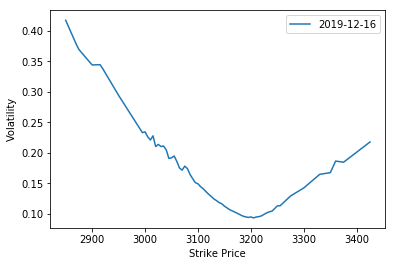

In [144]:

plt.plot(SPX_Call_tm['Strike'], SPX_Call_tm['Implied Volatility'])
plt.legend(SPX_Call_tm['Exp_Date'])
plt.ylabel('Volatility')
plt.xlabel('Strike Price')
plt.show()

In [ ]:
def black_scholes_call(S, K, T, rf, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #rf: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (log(S / K) + (rf + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    #d2 = (np.log(S / K) + (rf - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma*sqrt(T)
    
    call = (S * stats.norm.cdf(d1) - K * exp(-rf * T) * stats.norm.cdf(d2))
    
    return call

In [ ]:
black_scholes_call(50, 100, 1, 0.05, 0.2)

In [5]:
SPX_Call.Strike.to_list()

[1950,
 2000,
 2200,
 2480,
 2500,
 2525,
 2580,
 2630,
 2670,
 2700,
 2750,
 2760,
 2800,
 2810,
 2815,
 2820,
 2835,
 2840,
 2850,
 2860,
 2865,
 2875,
 2880,
 2890,
 2895,
 2900,
 2910,
 2915,
 2920,
 2925,
 2930,
 2935,
 2940,
 2945,
 2950,
 2955,
 2960,
 2965,
 2970,
 2975,
 2980,
 2985,
 2990,
 2995,
 3000,
 3005,
 3010,
 3015,
 3020,
 3025,
 3030,
 3035,
 3040,
 3045,
 3050,
 3055,
 3060,
 3065,
 3070,
 3075,
 3080,
 3085,
 3090,
 3095,
 3100,
 3105,
 3110,
 3115,
 3120,
 3125,
 3130,
 3135,
 3140,
 3145,
 3150,
 3155,
 3160,
 3165,
 3170,
 3175,
 3180,
 3185,
 3190,
 3195,
 3200,
 3205,
 3210,
 3215,
 3220,
 3225,
 3230,
 3235,
 3240,
 3245,
 3250,
 3255,
 3260,
 3265,
 3270,
 3275,
 3280,
 3285,
 3290,
 3295,
 3300,
 3305,
 3310,
 3320,
 3325,
 3330,
 3340,
 3350,
 3355,
 3375,
 3400,
 3425,
 3500,
 3600,
 2850,
 2870,
 2875,
 2900,
 2915,
 2920,
 2950,
 2995,
 3000,
 3005,
 3010,
 3015,
 3020,
 3025,
 3030,
 3035,
 3040,
 3045,
 3050,
 3055,
 3060,
 3065,
 3070,
 3075,
 3080,

In [6]:
S = 3135.96 #as on 12 Dec 2019
K = SPX_Call.Strike.to_list()
TM = SPX_Call['Time to Maturity'].to_list()
T = [x/365 for x in TM]
rf = 0.025 
sigma = SPX_Call['Implied Volatility'].to_list()

The Black Scholes call option formula is calculated by multiplying the stock price by the cumulative standard normal probability distribution function. Thereafter, the net present value (NPV) of the strike price multiplied by the cumulative standard normal distribution is subtracted from the resulting value of the previous calculation.

In mathematical notation:

\begin{aligned} &C = S_t N(d _1) - K e ^{-rt} N(d _2)\\ &\textbf{where:}\\ &d_1 = \frac{ln\frac{S_t}{K} + (r+ \frac{\sigma ^{2} _v}{2}) \ t}{\sigma_s \ \sqrt{t}}\\ &\text{and}\\ &d_2 = d _1 - \sigma_s \ \sqrt{t}\\ &\textbf{where:}\\ &C = \text{Call option price}\\ &S = \text{Current stock (or other underlying) price}\\ &K = \text{Strike price}\\ &r = \text{Risk-free interest rate}\\ &t = \text{Time to maturity}\\ &N = \text{A normal distribution}\\ \end{aligned} 


In [7]:
def black_scholes_call(S, K, T, rf, sigma):
    
    #S: Underlying Stock Price at t=0
    #K: strike price
    #T: time to maturity
    #rf: Risk free rate
    #sigma: volatility of underlying asset
    
    Call_Option_Prices = []
    N = len(K)
    for val in range(0,N):

        d1 = (log(S / K[val]) + (rf + 0.5 * sigma[val] ** 2) * T[val]) / (sigma[val] * sqrt(T[val]))
        #d2 = (np.log(S / K) + (rf - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = d1 - sigma[val] *sqrt(T[val])

        call = (S * stats.norm.cdf(d1) - K[val] * exp(-rf * T[val]) * stats.norm.cdf(d2))
        Call_Option_Prices.append(call)

    return Call_Option_Prices

In [8]:
#Calculating Black Scholes Option Prices for all the Options for SPX - 
BS_Option_Price = black_scholes_call(S, K, T, rf, sigma)
SPX_Call['Black Scholes Price'] = BS_Option_Price

C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


In [9]:
SPX_Call

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,Exp_Date,Current Date,Time to Maturity,Black Scholes Price
0,SPXW191213C01950000,2019-12-04 10:47AM EST,1950,1164.00,1183.6,1189.8,0.0,-,1,9,1.6162,2019-12-13,2019-12-10,3,1186.417488
1,SPXW191213C02000000,2019-11-27 1:20PM EST,2000,1149.91,1133.6,1139.8,0.0,-,-,10,1.5361,2019-12-13,2019-12-10,3,1136.428297
2,SPXW191213C02200000,2019-12-06 3:12PM EST,2200,946.48,933.7,939.8,0.0,-,1,1,1.2520,2019-12-13,2019-12-10,3,936.484713
3,SPXW191213C02480000,2019-11-18 12:03AM EST,2480,612.58,653.8,659.9,0.0,-,-,10,0.8833,2019-12-13,2019-12-10,3,656.577330
4,SPXW191213C02500000,2019-10-30 10:22AM EST,2500,530.52,639.9,644.8,0.0,-,1,1,1.2418,2019-12-13,2019-12-10,3,639.041046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,SPX211217C04100000,2019-12-04 2:29PM EST,4100,15.35,15.9,17.0,0.0,-,600,1381,0.1228,2021-12-17,2019-12-10,738,31.085463
2764,SPX211217C04200000,2019-12-09 11:56AM EST,4200,12.47,11.8,12.7,0.0,-,4,3540,0.1233,2021-12-17,2019-12-10,738,23.808869
2765,SPX211217C04300000,2019-11-27 2:52PM EST,4300,9.30,8.8,9.7,0.0,-,1,1907,0.1244,2021-12-17,2019-12-10,738,18.557487
2766,SPX211217C04400000,2019-12-03 11:55AM EST,4400,6.33,6.8,7.5,0.0,-,3,54,0.1258,2021-12-17,2019-12-10,738,14.639212


In [88]:
SPX_Call['Current Price'] = 3135.96

In [99]:
SPX_Call['Future Price'] = SPX_Call['Current Price'] * np.exp(0.025 * SPX_Call['Time to Maturity'])

In [100]:
#SPX_Call['Future Price'] = SPX_Call['Current Price'].map(lambda x : x* np.exp(0.025 * ))

def to_float(exp_value):
    return float(exp_value)

In [102]:
SPX_Call['Future Price'] = SPX_Call['Future Price'].apply(to_float)
SPX_Call.head()

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,Exp_Date,Current Date,Time to Maturity,Black Scholes Price,Current Price,Future Price
0,SPXW191213C01950000,2019-12-04 10:47AM EST,1950,1164.00,1183.6,1189.8,0.0,-,1,9,1.6162,2019-12-13,2019-12-10,3,1186.417488,3135.96,3380.201582
1,SPXW191213C02000000,2019-11-27 1:20PM EST,2000,1149.91,1133.6,1139.8,0.0,-,-,10,1.5361,2019-12-13,2019-12-10,3,1136.428297,3135.96,3380.201582
2,SPXW191213C02200000,2019-12-06 3:12PM EST,2200,946.48,933.7,939.8,0.0,-,1,1,1.2520,2019-12-13,2019-12-10,3,936.484713,3135.96,3380.201582
3,SPXW191213C02480000,2019-11-18 12:03AM EST,2480,612.58,653.8,659.9,0.0,-,-,10,0.8833,2019-12-13,2019-12-10,3,656.577330,3135.96,3380.201582
4,SPXW191213C02500000,2019-10-30 10:22AM EST,2500,530.52,639.9,644.8,0.0,-,1,1,1.2418,2019-12-13,2019-12-10,3,639.041046,3135.96,3380.201582


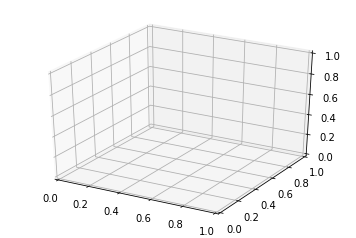

In [63]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

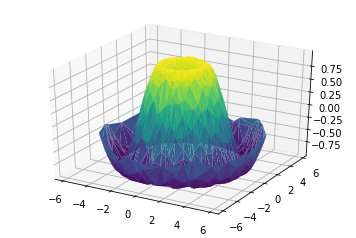

In [69]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,cmap='viridis', edgecolor='none');

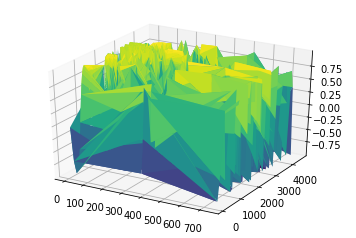

In [74]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = SPX_Call['Time to Maturity']
y = SPX_Call['Strike']
z = f(x, y)
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,cmap='viridis', edgecolor='none');

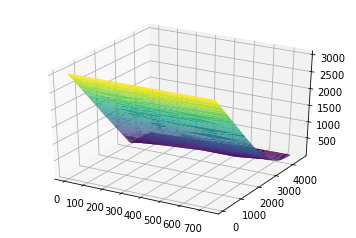

In [78]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = SPX_Call['Time to Maturity']
y = SPX_Call['Strike']
z = SPX_Call['Black Scholes Price']    #f(x, y)
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,cmap='viridis', edgecolor='none');

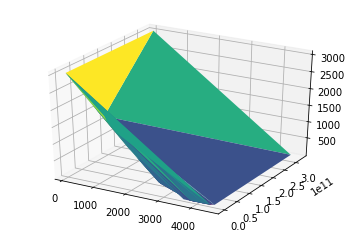

In [109]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = SPX_Call['Strike']
z = SPX_Call['Black Scholes Price']
y = SPX_Call['Future Price']    #f(x, y)
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,cmap='viridis', edgecolor='none');

In [110]:
#working 
def STATE_PRICE_DENSITY(C, STRIKE, St):
    '''
    CONSTRUCT A SPREAD POSITION
    LONG THE CALL AT K1 
    SHORT THE CALL AT K2
    '''
    N = len(C)
    P = np.zeros((N,1))
    for n in range(0, N-1):
        if(n==0):
            P[0] = 1-(St-C[0])/STRIKE[0]
        else:
            P[n] = 1-(C[n]-C[n-1])/(STRIKE[n]-STRIKE[n-1])    

    P[N-1] = 1- sum(P[:-1])
    P = sorted(P)
    #print(len(P))
    #print(C.shape)
    #print(STRIKE.shape)
    
    
    #SPD = (P[1:]-P[0:-1])/(STRIKE[1:]-STRIKE[0:-1])
    SPD = []
    for j in range(1, len(P)):
        state = (P[j]-P[j-1])/(STRIKE[j]-STRIKE[j-1])
        SPD.append(state)
    
    SPD = [0 if x =='NAN' else x for x in SPD]
    SPD = SPD[2:-1]
    #print(SPD)
    return SPD
    #print(len(SPD))

    

In [112]:
St = 3135.96
SPD = STATE_PRICE_DENSITY(SPX_Call['Black Scholes Price'],SPX_Call['Strike'],St)
SPD

C:\Users\nikhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


[array([0.001076]),
 array([0.00901181]),
 array([0.00853867]),
 array([0.00048777]),
 array([0.00773817]),
 array([0.02211979]),
 array([0.01121623]),
 array([0.0054966]),
 array([0.01234003]),
 array([0.00046412]),
 array([0.01549048]),
 array([0.05188137]),
 array([0.00180074]),
 array([0.00853028]),
 array([0.01341055]),
 array([0.00978825]),
 array([0.00633033]),
 array([0.0019427]),
 array([0.00284181]),
 array([0.00386755]),
 array([0.00126017]),
 array([0.01825096]),
 array([0.0022008]),
 array([0.0156646]),
 array([0.00084001]),
 array([0.00157218]),
 array([0.00658246]),
 array([0.00411079]),
 array([0.0019828]),
 array([0.02628233]),
 array([0.01425927]),
 array([0.00016139]),
 array([0.00791967]),
 array([0.00248816]),
 array([0.00545014]),
 array([0.01341253]),
 array([0.00087574]),
 array([0.01000267]),
 array([0.01136373]),
 array([0.00820282]),
 array([0.01639253]),
 array([0.00178753]),
 array([0.01039555]),
 array([0.00106976]),
 array([0.01740432]),
 array([0.0113294

Text(0,0.5,'State Price Density')

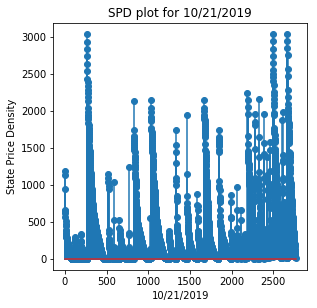

In [124]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax

plt.figure(3, figsize=(10,10))
plt.subplot(2,2,3)
plt.stem(SPX_Call['Black Scholes Price'])
plt.title('SPD plot for 10/21/2019')
plt.xlabel('10/21/2019')
plt.ylabel('State Price Density')


Text(0,0.5,'State Price Density')

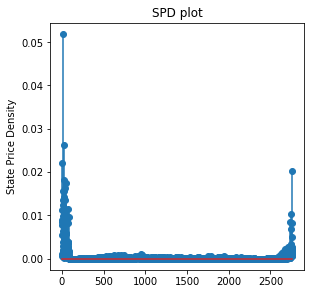

In [138]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax

plt.figure(3, figsize=(10,10))
plt.subplot(2,2,3)
plt.stem(SPD)
plt.title('SPD plot')
plt.xlabel('')
plt.ylabel('State Price Density')


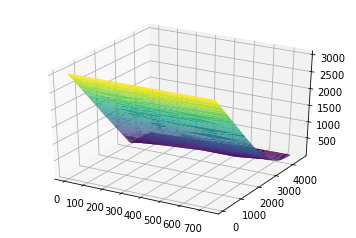

In [122]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

y = SPX_Call['Strike']
z = SPX_Call['Black Scholes Price']
x = SPX_Call['Time to Maturity']    #f(x, y)
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,cmap='viridis', edgecolor='none');

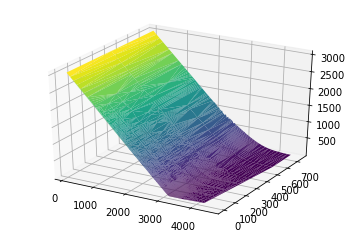

In [123]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = SPX_Call['Strike']
z = SPX_Call['Black Scholes Price']
y = SPX_Call['Time to Maturity']    #f(x, y)
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,cmap='viridis', edgecolor='none');



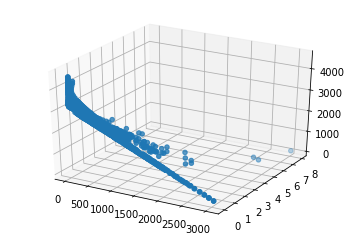

In [129]:
import sys
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
zline = SPX_Call['Strike']
xline = SPX_Call['Black Scholes Price']
yline = SPX_Call['Implied Volatility']
ax.scatter3D(xline, yline, zline, 'red')

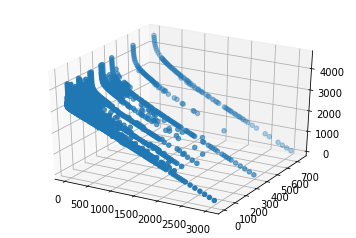

In [127]:
import sys
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
zline = SPX_Call['Strike']
xline = SPX_Call['Black Scholes Price']
yline = SPX_Call['Time to Maturity']
ax.scatter3D(xline, yline, zline, 'red')